In [23]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np  


In [2]:
dataset = pd.read_csv("./datasets/Weather.csv")
dataset.head()

C:\Users\Pravesh Bisaria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
X = dataset.filter(['MinTemp'])
y = dataset.filter(['MaxTemp'])


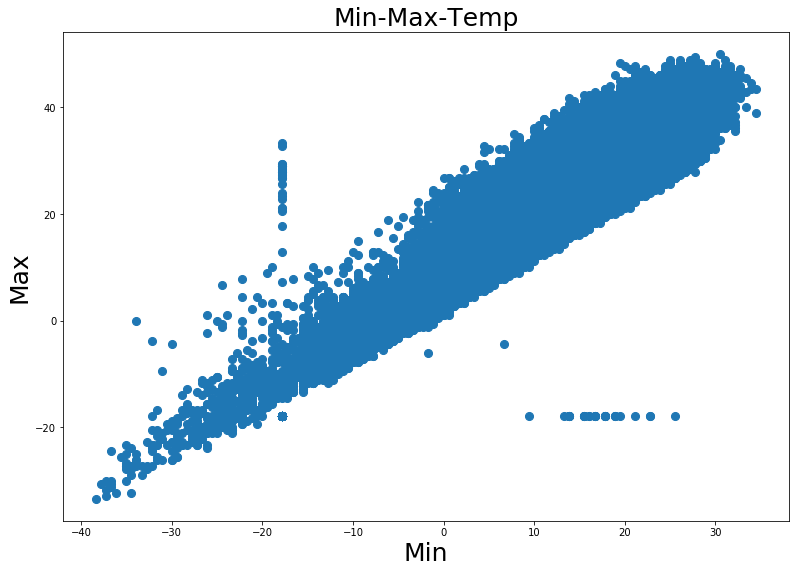

In [17]:
plt.figure(figsize=(13, 9))
plt.scatter(X,y,s=65)
plt.xlabel('Min',fontsize=25)
plt.ylabel('Max',fontsize=25)
plt.title('Min-Max-Temp',fontsize=25)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [24]:
from sklearn import metrics as me
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.198996082109215


In [25]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)


[10.66185201]
[[0.92033997]]


In [26]:
score

0.7670218843587753

In [27]:
from pickle import dump
dump(regressor, open('model.pkl', 'wb'))